In [2]:
import numpy as np
import pandas as pd

# Using 'ISO-8859-1' encoding
df = pd.read_csv(r"C:\Users\rohan\OneDrive\Desktop\machine-learning-project\email-spam-classifier\spam.csv", encoding='ISO-8859-1')

# Alternatively, try 'latin1'
# df = pd.read_csv(r"C:\Users\rohan\OneDrive\Desktop\machine-learning-project\email-spam-classifier\spam.csv", encoding='latin1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
512,ham,Lol ok your forgiven :),NaN,NaN,NaN
1754,ham,How is your schedule next week? I am out of to...,NaN,NaN,NaN
1880,ham,Just seeing your missed call my dear brother. ...,NaN,NaN,NaN
5138,ham,Yup... I havent been there before... You want ...,NaN,NaN,NaN
1076,ham,Where can download clear movies. Dvd copies.,NaN,NaN,NaN


In [6]:
df.shape


(5572, 5)

In [8]:
#1. Data Cleaning
#2. EDA
#3. Text Processing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

## 1. Data Cleaning

In [11]:
#checking if there is need of the other columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [15]:
df.sample(5)

,v1,v2
3843,ham,"Yeah that's what I thought, lemme know if anyt..."
3261,ham,O shore are you takin the bus
399,ham,Hmmm...k...but i want to change the field quic...
4366,ham,I like dis sweater fr mango but no more my siz...
916,ham,Was actually about to send you a reminder toda...


In [17]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
1091,ham,Please da call me any mistake from my side sor...
160,ham,Keep yourself safe for me because I need you a...
1540,ham,K come to nordstrom when you're done
5523,ham,Going to join tomorrow.
2411,ham,"Come to me right now, Ahmad"


In [19]:
#converting targert values in numerical
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [25]:
df['target']=encoder.fit_transform(df['target'])


In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
#missing value checking
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
#check for duplicate values
df.duplicated().sum()


403

In [33]:
#remove duplicates
df = df.drop_duplicates(keep='first')



In [35]:
df.duplicated().sum()

0

In [37]:
df.shape

(5169, 2)

## 2. EDA

In [41]:
#Exploratory data analysis
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

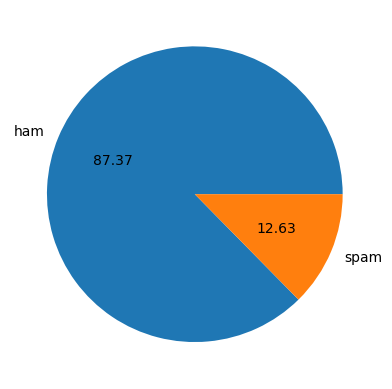

In [45]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [47]:
#Data is imbalanced

In [49]:
import nltk

In [51]:
!pip install nltk

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
df['num_characters'] = df['text'].apply(len)

In [59]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [65]:
# Number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [71]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [75]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
#for ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [79]:
#for ham messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [81]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

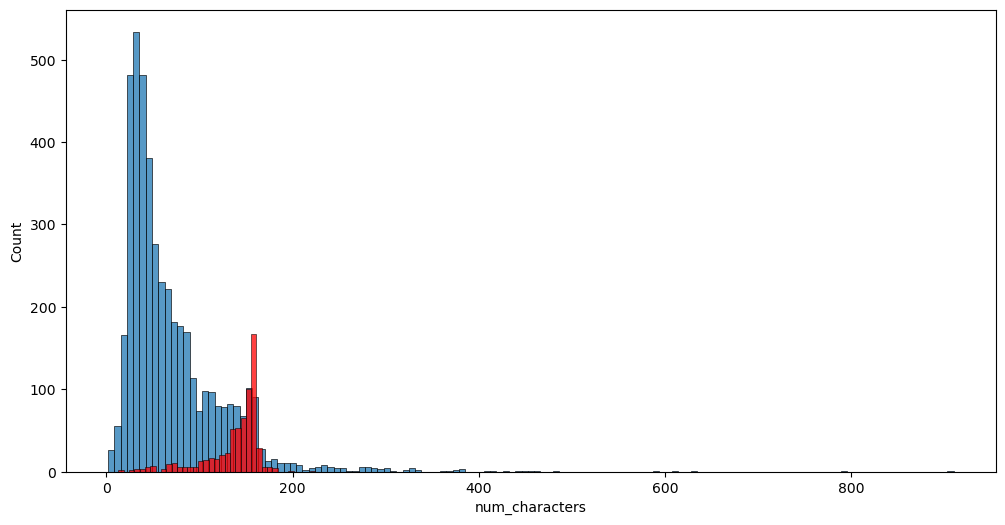

In [83]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

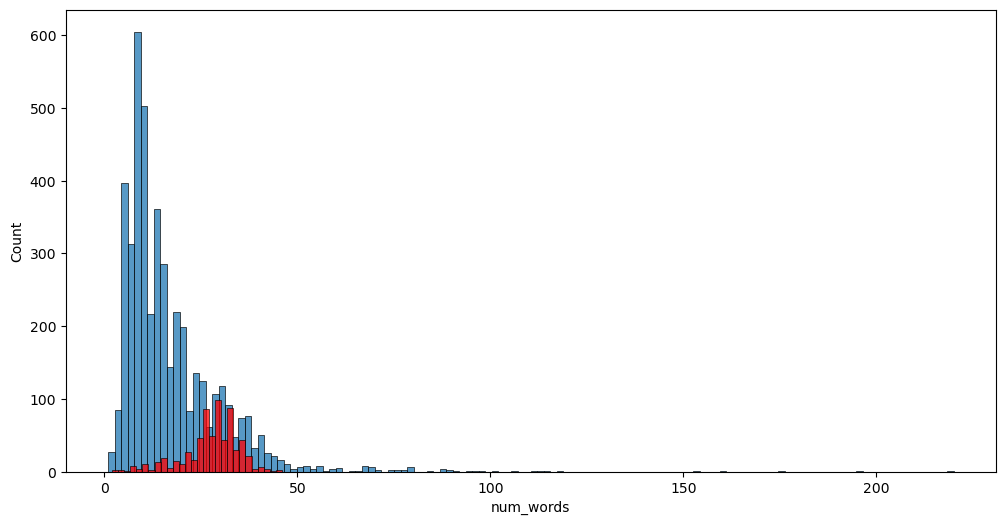

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

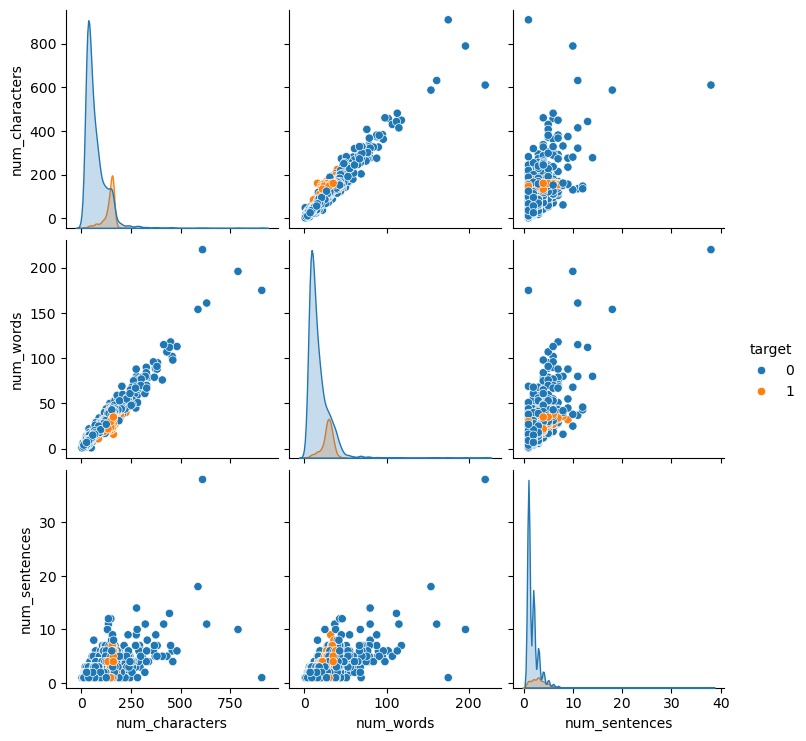

In [87]:
sns.pairplot(df,hue='target')

<Axes: >

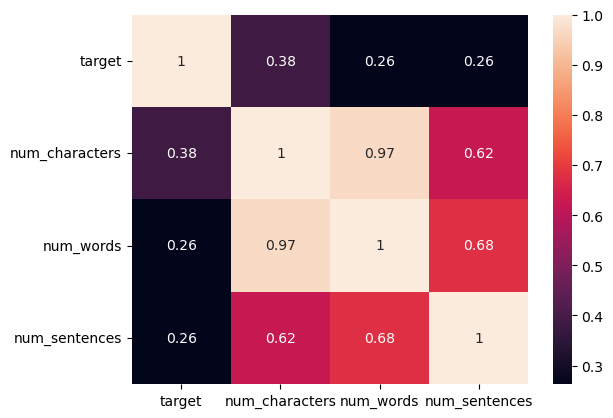

In [93]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

## 3. Data Preprocessing
    Lower Case
    Tokenization
    Removing Special Charatcters
    Removing Stop words
    stemming

In [126]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

        
            
    return " ".join(y)

In [134]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [132]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [122]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [138]:
df['transformed_text'] = df['text'].apply(transform_text)

In [139]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [142]:
from wordcloud import WordCloud
wc = WordCloud(width=5000,height=5000,min_font_size=10,background_color='white')

In [144]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

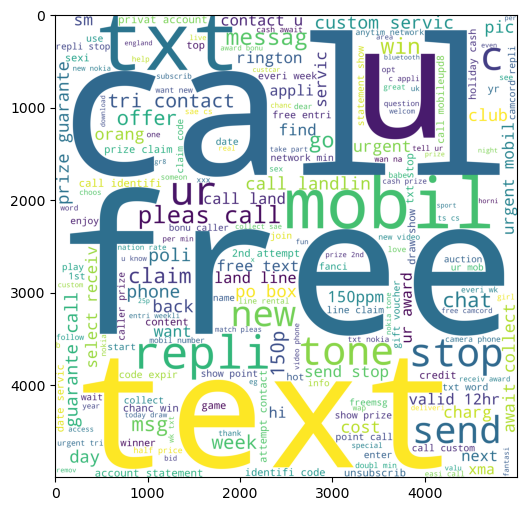

In [145]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [148]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

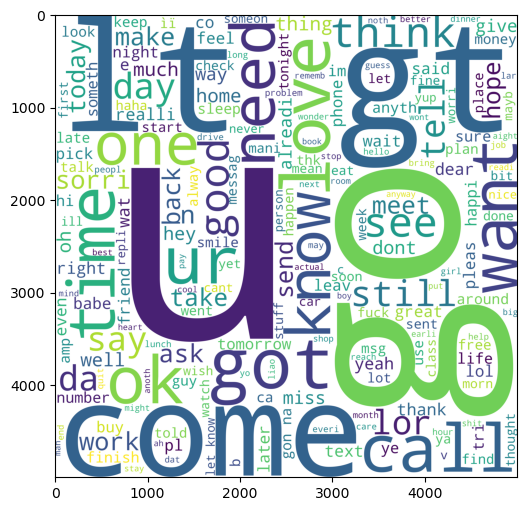

In [149]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [152]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [154]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [158]:
len(spam_corpus)

9939

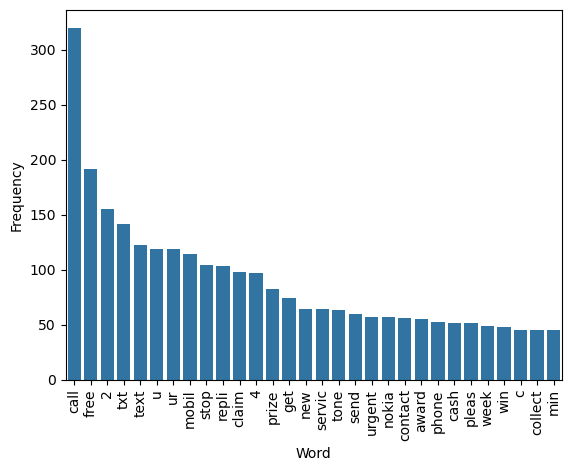

In [162]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the most common words
spam_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use correct keyword arguments for sns.barplot
sns.barplot(x=spam_data['Word'], y=spam_data['Frequency'])

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()


In [164]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [166]:
len(ham_corpus)

35404

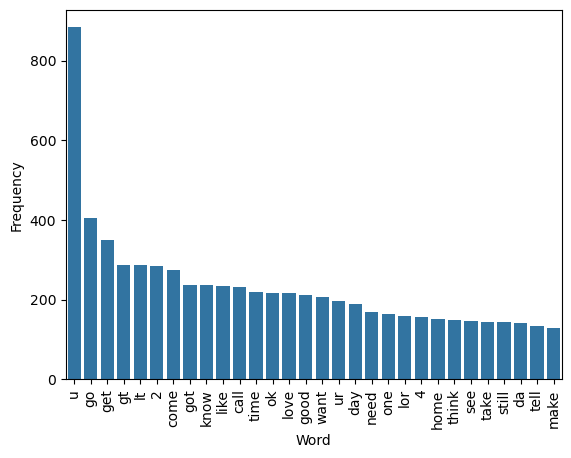

In [168]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the most common words
ham_data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use correct keyword arguments for sns.barplot
sns.barplot(x=ham_data['Word'], y=ham_data['Frequency'])

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()


## 4. Model Building 

In [171]:
#text Vectorization
#using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [372]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [374]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [376]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [378]:
X.shape

(5169, 3000)

In [380]:
y = df['target'].values

In [382]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming X and y are already defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create instances of the classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Training and predictions with GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1, average='weighted'))


Accuracy: 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision: 0.9054755995131818


In [386]:
# Training and predictions with GaussianNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2, average='weighted'))


Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision: 0.971926423835803


In [388]:
# Training and predictions with GaussianNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3, average='weighted'))


Accuracy: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision: 0.9836958370815164


In [390]:
# tfidf--->mnb

In [392]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # Fixed typo in class name
from sklearn.ensemble import RandomForestClassifier  # Fixed typo in class name
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier  # Fixed import (should be in sklearn.tree)
from sklearn.ensemble import GradientBoostingClassifier  # Fixed typo in class name



In [394]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)  # Fixed typo in 'n_estimator' and 'random_states'
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  # Fixed typo in 'n_estiumators' and 'random_states'
bc = BaggingClassifier(n_estimators=50, random_state=2)  # Fixed typo in 'n_estiumators' and 'random_states'
etc = ExtraTreeClassifier()  # Removed invalid 'n_estimators' and 'random_states' (ExtraTreeClassifier does not support them)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)  # Fixed typo in 'n_estiumators' and 'random_states'


In [396]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT' : gbdt
}

In [398]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [400]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [402]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.941972920696325
Precision -  0.7746478873239436
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [404]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # Convert `clfs.keys()` to a list
    'Accuracy': accuracy_scores,
    'Precision': precision_scores  # Use `precision_scores` instead of `precision`
}).sort_values('Precision', ascending=False)


In [406]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.929400,0.828283
8,ETC,0.941973,0.774648


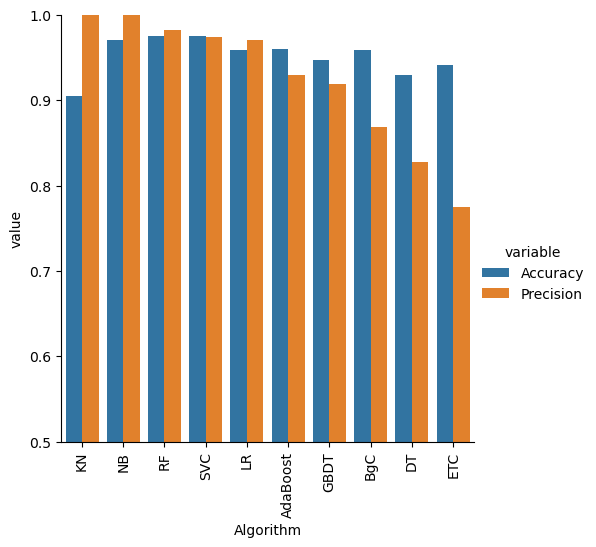

In [408]:
# Melt the DataFrame before plotting to get 'variable' and 'value' columns
performance_df1 = performance_df.melt(id_vars='Algorithm', var_name='variable', value_name='value')

sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [410]:
#model improve
# 1. Change the max_features parameter of TFIdf

In [412]:
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # Convert clfs.keys() to a list
    'Accuracy_max_ft_3000': accuracy_scores,  # Fixed typo in key name
    'Precision_max_ft_3000': precision_scores  # Fixed typo in key name
})



In [414]:
performance_df.merge(temp_df, on='Algorithm')  # Ensure assignment back to performance_df


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,LR,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.960348,0.929204,0.960348,0.929204
6,GBDT,0.946809,0.919192,0.946809,0.919192
7,BgC,0.958414,0.868217,0.958414,0.868217
8,DT,0.929400,0.828283,0.929400,0.828283
9,ETC,0.941973,0.774648,0.941973,0.774648


In [416]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))